In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


# 1. Mengumpulkan Data

In [4]:
df = pd.read_csv('/content/Train (2).csv')

In [5]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


#2. Menelaah Data

## Menganalisis tipe dan relasi data

In [6]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [8]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

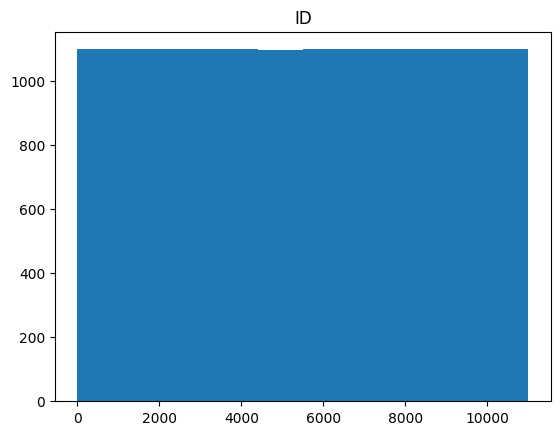

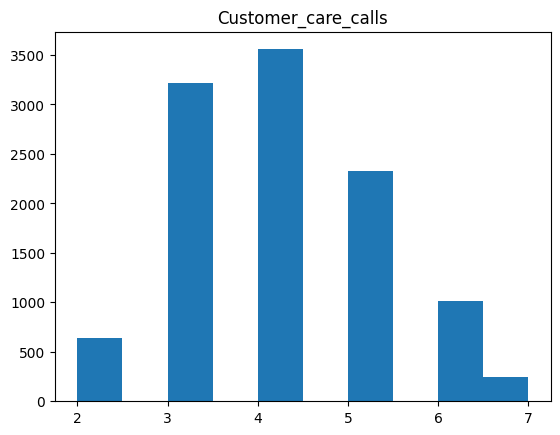

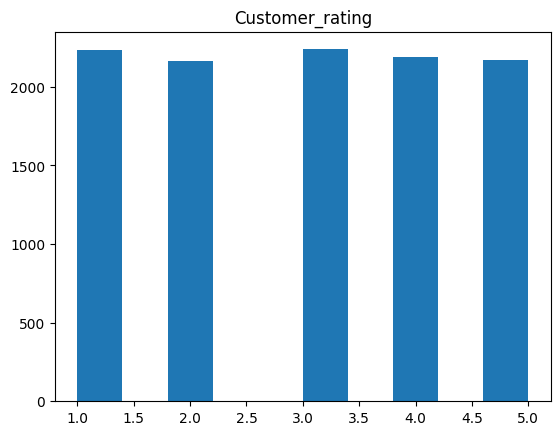

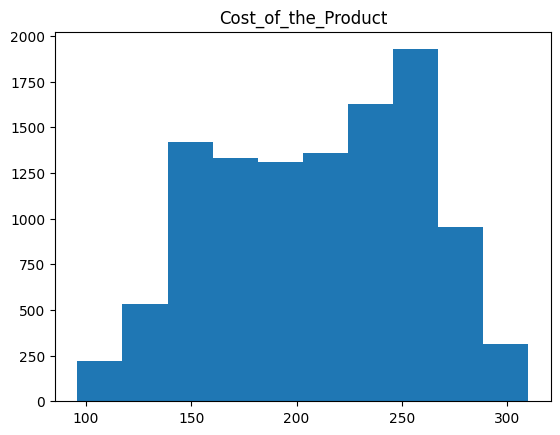

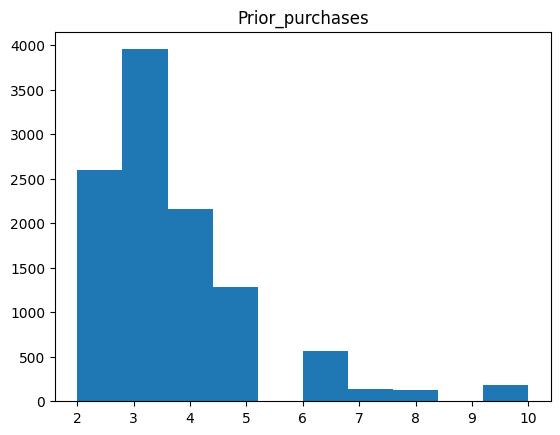

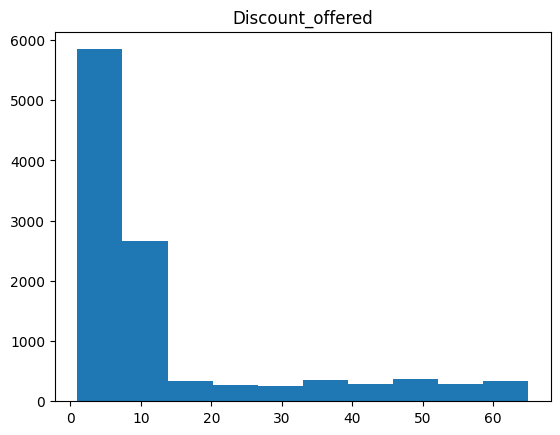

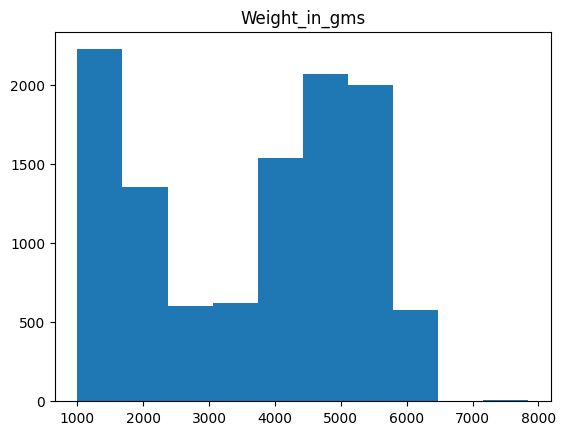

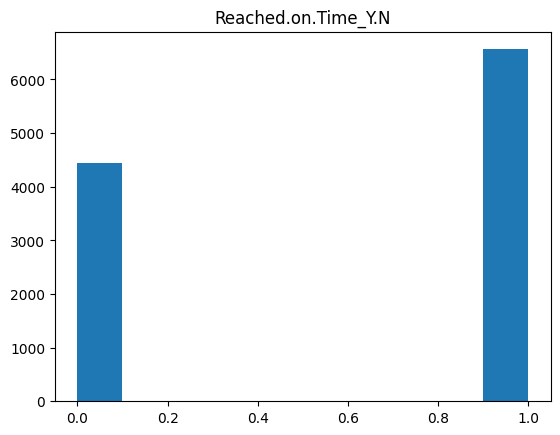

In [9]:
# Menampilkan visualisasi histogram untuk kolom numerikal
df_col = df.select_dtypes(exclude='object').columns.to_list()
for col in df_col:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

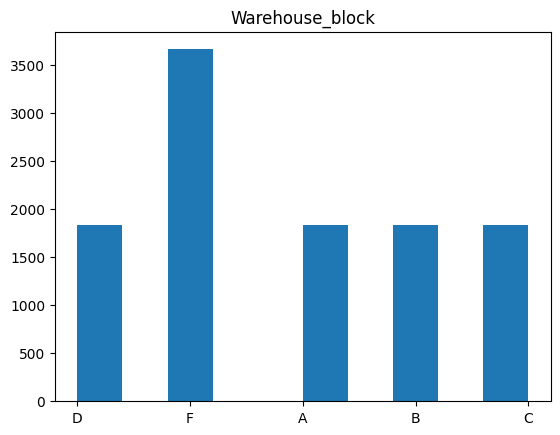

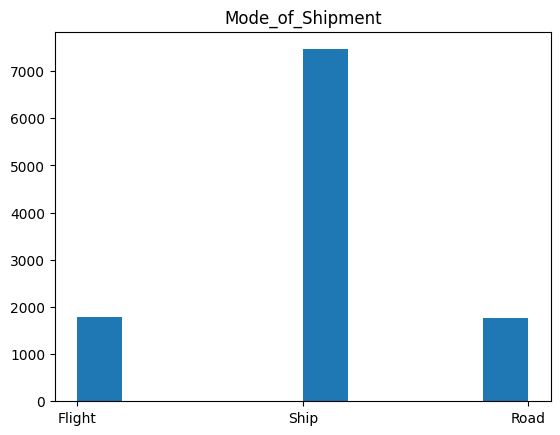

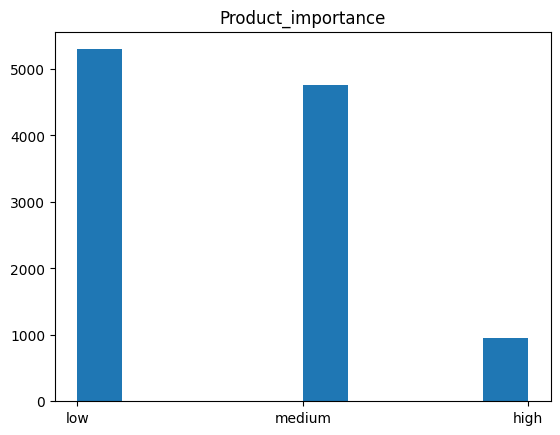

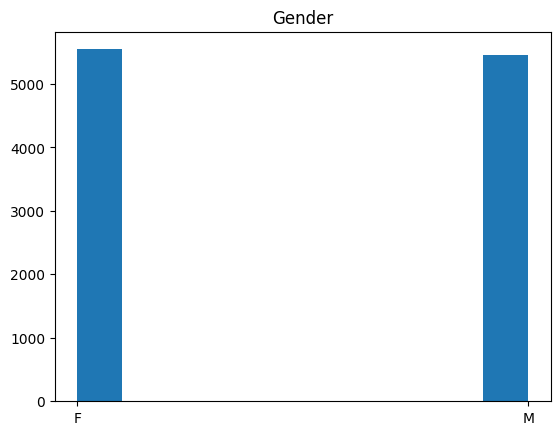

In [10]:
# Menampilkan visualisasi histogram
df_col = df.select_dtypes(include='object').columns.to_list()
for col in df_col:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

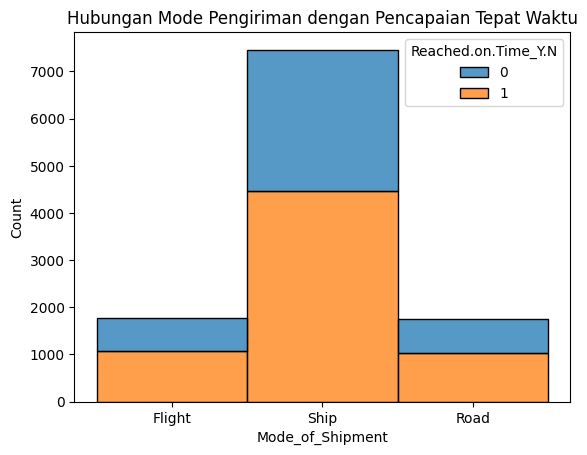

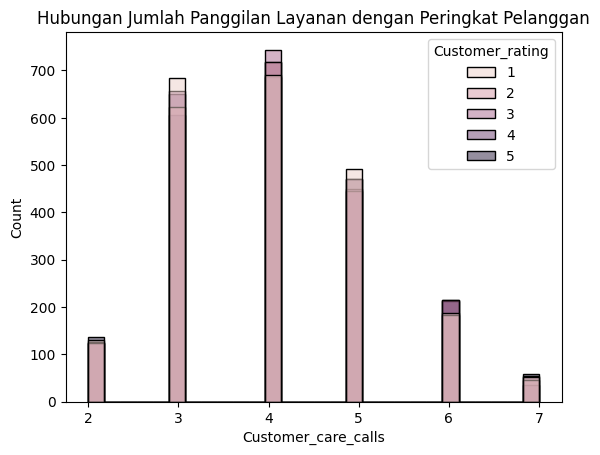

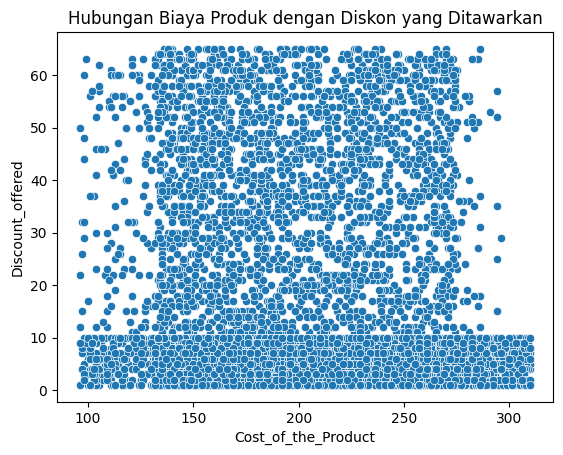

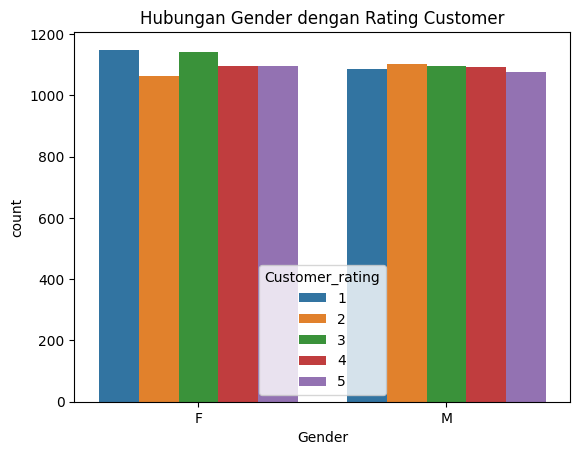

In [11]:
# Menampilkan relasi antara 'Mode_of_Shipment' dan 'Reached.on.Time_Y.N' menggunakan histogram
sns.histplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', multiple='stack')
plt.title('Hubungan Mode Pengiriman dengan Pencapaian Tepat Waktu')
plt.show()

# Menampilkan relasi antara 'Customer_care_calls' dan 'Customer_rating' menggunakan scatter plot
sns.histplot(data=df, x='Customer_care_calls', hue='Customer_rating')
plt.title('Hubungan Jumlah Panggilan Layanan dengan Peringkat Pelanggan')
plt.show()

# Menampilkan hubungan antara 'Cost_of_the_Product' dan 'Discount_offered' menggunakan scatter plot
sns.scatterplot(data=df, x='Cost_of_the_Product', y='Discount_offered')
plt.title('Hubungan Biaya Produk dengan Diskon yang Ditawarkan')
plt.show()

# Menampilkan relasi antara 'Mode_of_Shipment' dan 'Reached.on.Time_Y.N' menggunakan histogram
sns.countplot(data=df, x='Gender', hue='Customer_rating')
plt.title('Hubungan Gender dengan Rating Customer')
plt.show()

## Menganalisis Karakteristik Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [13]:
df.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [14]:
# Melihat unique value pada feature dengan data type object
for x in df.select_dtypes(include= 'object' ):
    print(f'====={x}=====\n')
    print(df[x].unique())

=====Warehouse_block=====

['D' 'F' 'A' 'B' 'C']
=====Mode_of_Shipment=====

['Flight' 'Ship' 'Road']
=====Product_importance=====

['low' 'medium' 'high']
=====Gender=====

['F' 'M']


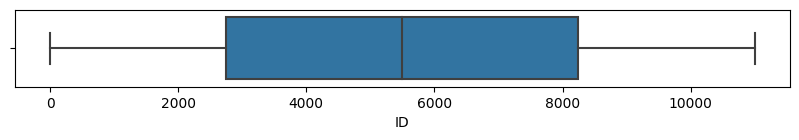

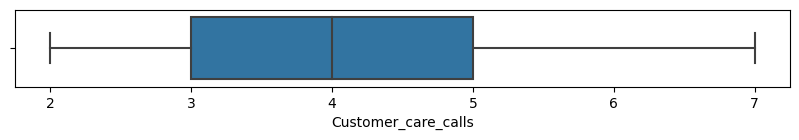

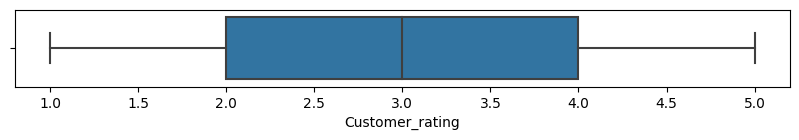

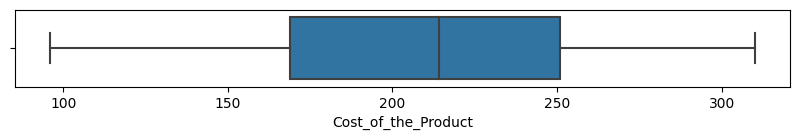

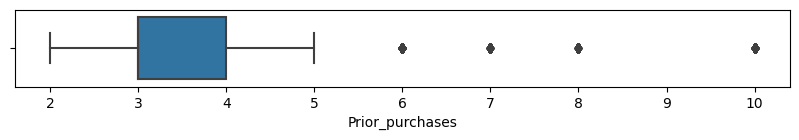

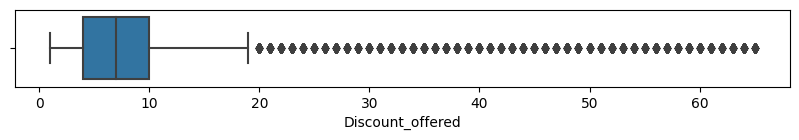

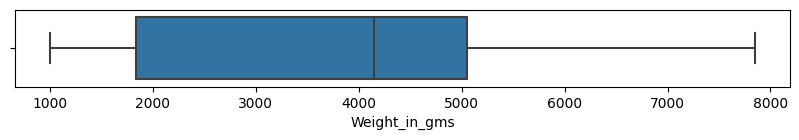

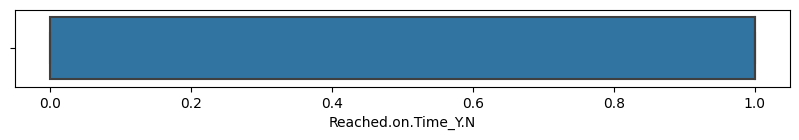

In [15]:
# Melihat Outlier
col_number = df.select_dtypes(exclude = 'object').columns.to_list()
for col in col_number:
    plt.figure(figsize=(10,1))
    sns.boxplot(x = col, data =df)

<ipython-input-16-fd981fff791c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


<Axes: >

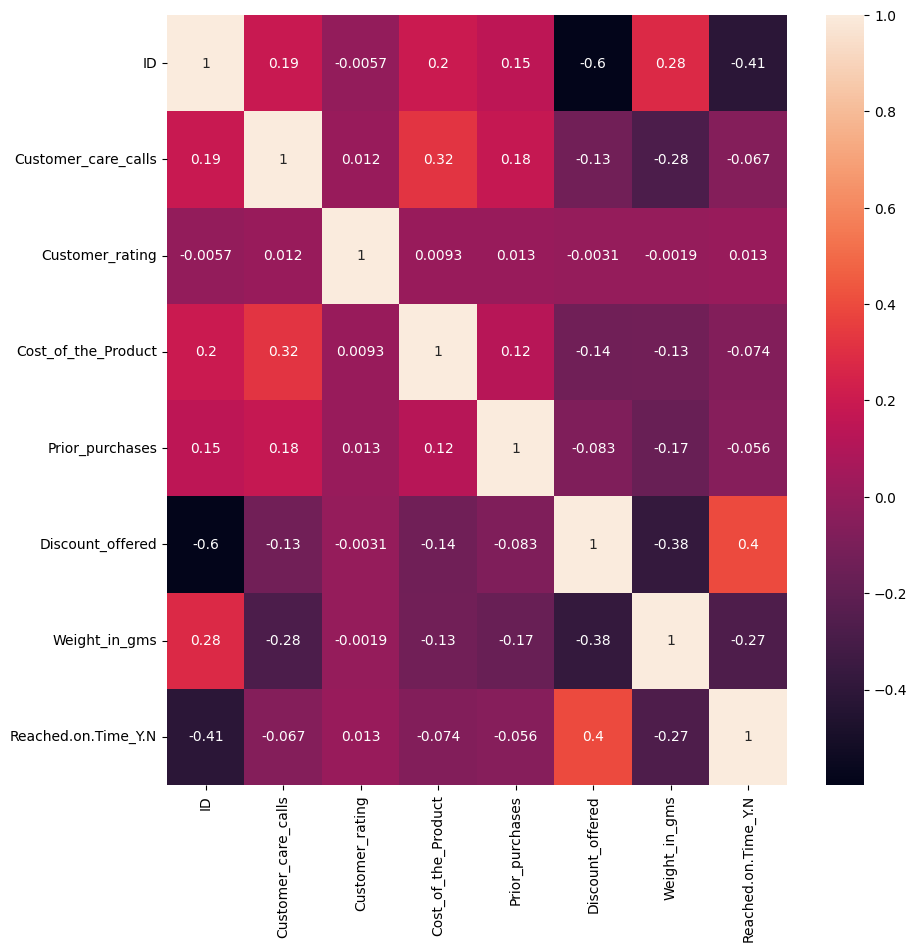

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot =True)

# Memvalidasi Data

## Melakukan Pengecekan Kelengkapan Data

In [17]:
# Melihat Missing Value Tiap Kolom
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [18]:
# Melihat apakah ada duplikasi data pada dataset
df.duplicated().sum()

0

In [19]:
# Persentase missing value tiap kolom
(df.isnull().sum() / df.shape[0]) * 100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

In [20]:
# Melihat unique value pada feature dengan data type object
for x in df.select_dtypes(include= 'object' ):
    print(f'====={x}=====\n')
    print(df[x].unique())

=====Warehouse_block=====

['D' 'F' 'A' 'B' 'C']
=====Mode_of_Shipment=====

['Flight' 'Ship' 'Road']
=====Product_importance=====

['low' 'medium' 'high']
=====Gender=====

['F' 'M']


In [21]:
 # Melihat unique value pada feature dengan data type object
for x in df.select_dtypes(include= 'object' ):
    print(f'====={x}=====\n')
    print(df[x].unique())

=====Warehouse_block=====

['D' 'F' 'A' 'B' 'C']
=====Mode_of_Shipment=====

['Flight' 'Ship' 'Road']
=====Product_importance=====

['low' 'medium' 'high']
=====Gender=====

['F' 'M']


# Menentukan Objek data

## Memutuskan kriteria dan teknik pemilihan data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


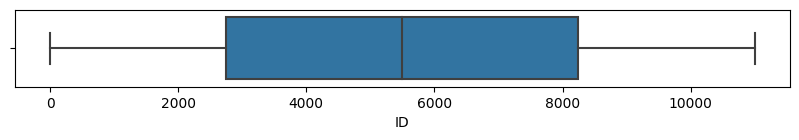

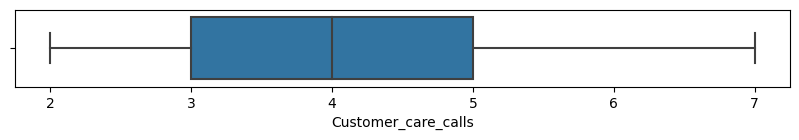

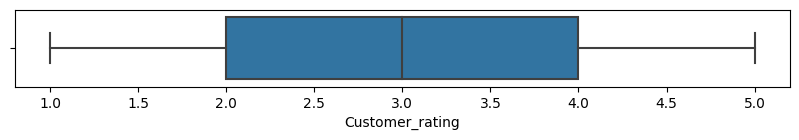

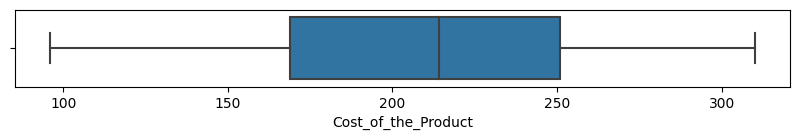

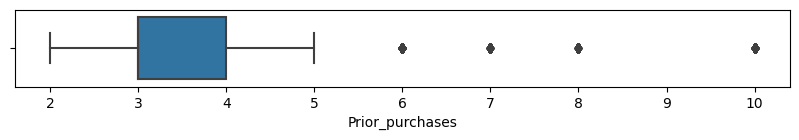

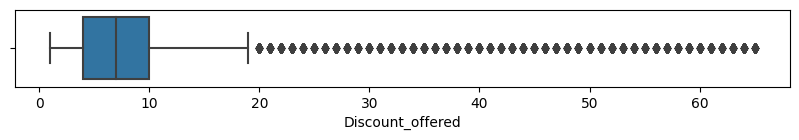

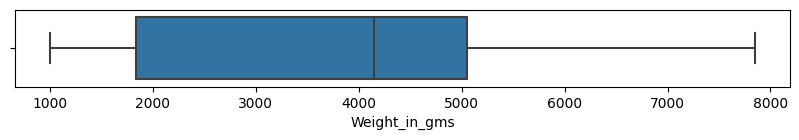

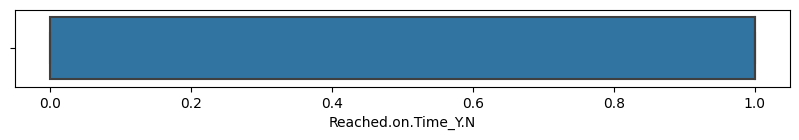

In [23]:
# Melihat Outlier
col_number = df.select_dtypes(exclude = 'object').columns.to_list()
for col in col_number:
    plt.figure(figsize=(10,1))
    sns.boxplot(x = col, data =df)

In [24]:
df.drop(columns='ID', axis=1, inplace=True )

In [25]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Membersihkan Data

## Melakukan Pembersihan Data Yang Kotor

In [26]:
# Melihat Missing Value Tiap Kolom
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [27]:
# Melihat apakah ada duplikasi data pada dataset
df.duplicated().sum()

0

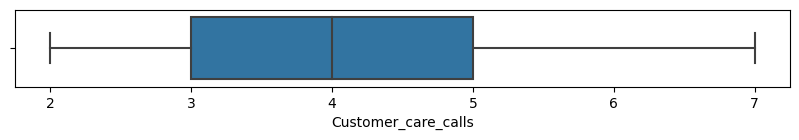

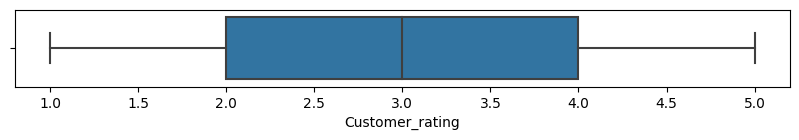

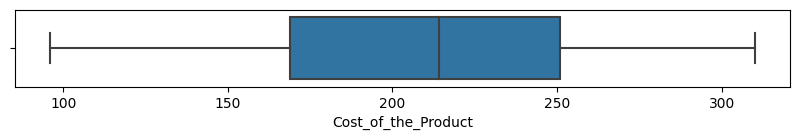

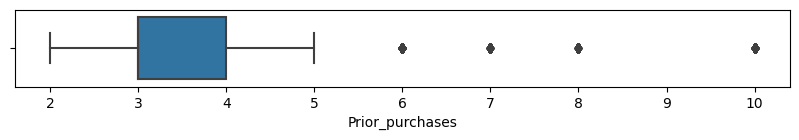

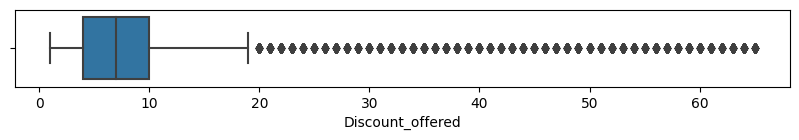

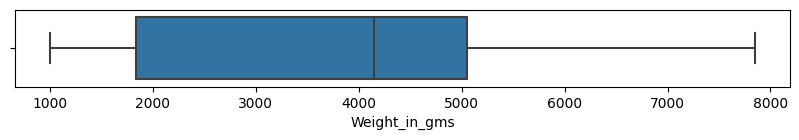

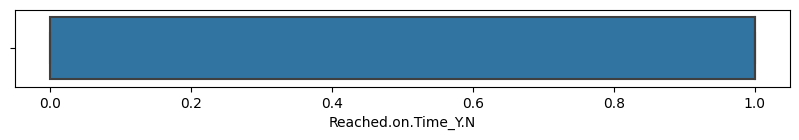

In [28]:
# Melihat Outlier
col_number = df.select_dtypes(exclude = 'object').columns.to_list()
for col in col_number:
    plt.figure(figsize=(10,1))
    sns.boxplot(x = col, data =df)

In [29]:
# Handling Outlier Dengan Teknik Winsorize
from scipy.stats.mstats import winsorize
kolom_outlier = ['Discount_offered', 'Prior_purchases']
for col in kolom_outlier:
  df[col] = winsorize(df[col], limits=[0, 0.10])

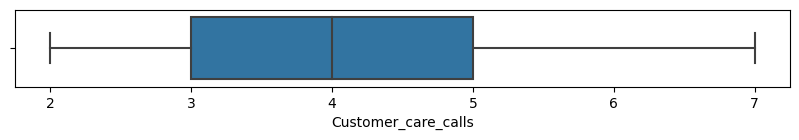

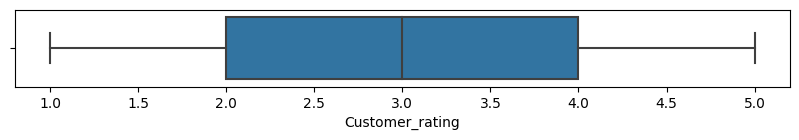

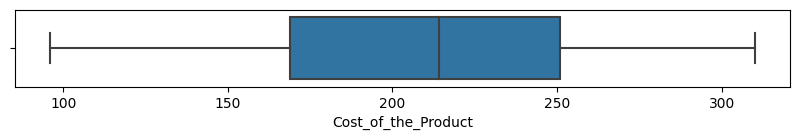

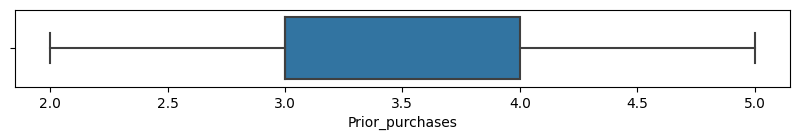

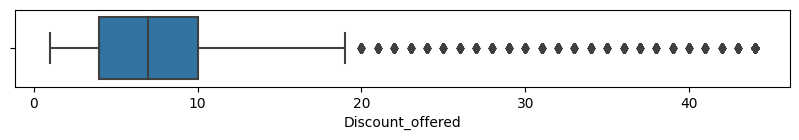

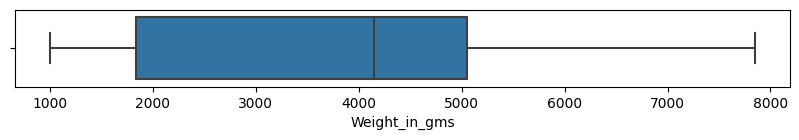

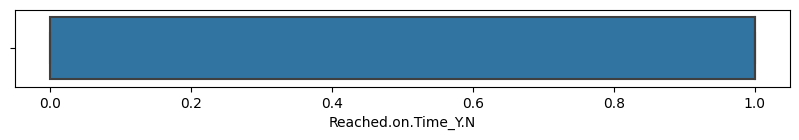

In [30]:
# Melihat Outlier
col_number = df.select_dtypes(exclude = 'object').columns.to_list()
for col in col_number:
    plt.figure(figsize=(10,1))
    sns.boxplot(x = col, data =df)

# Mengkonstruksi Data

In [31]:
df.select_dtypes(exclude = 'object').columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [32]:
for col in df.select_dtypes(exclude = 'object').columns.to_list():
  if col == 'Reached.on.Time_Y.N':
    pass
  else:
    df[col] = (df[col]-df[col].min()) / (df[col].max()-df[col].min())

In [33]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,0.4,0.25,0.378505,0.333333,low,F,1.000000,0.033893,1
1,F,Flight,0.4,1.00,0.560748,0.000000,low,M,1.000000,0.304894,1
2,A,Flight,0.0,0.25,0.406542,0.666667,low,M,1.000000,0.346676,1
3,B,Flight,0.2,0.50,0.373832,0.666667,medium,M,0.209302,0.025712,1
4,C,Flight,0.0,0.25,0.411215,0.333333,medium,F,1.000000,0.216654,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,0.4,0.00,0.728972,1.000000,medium,F,0.000000,0.078451,1
10995,B,Ship,0.4,0.00,0.635514,1.000000,medium,F,0.116279,0.035939,0
10996,C,Ship,0.6,0.75,0.682243,1.000000,low,F,0.069767,0.022498,0
10997,F,Ship,0.6,0.25,0.593458,1.000000,medium,M,0.023256,0.030533,0


# Pelabelan Data

## Melakukan Pelabelan Daata

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col_cat = df.select_dtypes(include = 'object').columns.to_list()
df[col_cat] = df[col_cat].apply(le.fit_transform)

In [35]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,0.4,0.25,0.378505,0.333333,1,0,1.000000,0.033893,1
1,4,0,0.4,1.00,0.560748,0.000000,1,1,1.000000,0.304894,1
2,0,0,0.0,0.25,0.406542,0.666667,1,1,1.000000,0.346676,1
3,1,0,0.2,0.50,0.373832,0.666667,2,1,0.209302,0.025712,1
4,2,0,0.0,0.25,0.411215,0.333333,2,0,1.000000,0.216654,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,0.4,0.00,0.728972,1.000000,2,0,0.000000,0.078451,1
10995,1,2,0.4,0.00,0.635514,1.000000,2,0,0.116279,0.035939,0
10996,2,2,0.6,0.75,0.682243,1.000000,1,0,0.069767,0.022498,0
10997,4,2,0.6,0.25,0.593458,1.000000,2,1,0.023256,0.030533,0


# Membangun Model

In [36]:
X = df.drop(columns = 'Reached.on.Time_Y.N')
y = df['Reached.on.Time_Y.N']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3)

In [50]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6290909090909091

In [52]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_rf, y_train_rf)
rf.score(X_test_rf, y_test_rf)

0.6530303030303031

In [53]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.67112081 0.5872886  0.43944354]
Avg : 0.5659509801048191


## evaluasi model

In [54]:
from sklearn.metrics import classification_report

In [56]:
y_pred = rf.predict(X_test_rf)

In [57]:
print(classification_report(y_test_rf, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62      1353
           1       0.75      0.62      0.68      1947

    accuracy                           0.65      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.65      0.66      3300

